In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [25]:
df = pd.read_csv('data/car_price.csv')
df.head()

,age,price
0,0.00,26411
1,0.05,25188
2,0.10,25518
3,0.15,26396
4,0.20,25966


In [26]:
df.describe()

,age,price
count,400.000000,400.000000
mean,10.000000,10492.212500
std,5.795457,5752.972661
min,0.000000,3392.000000
25%,4.997500,6047.750000
50%,10.000000,7833.500000
75%,15.002500,14427.000000
max,20.000000,26411.000000


In [27]:
df.corr()

,age,price
age,1.000000,-0.871128
price,-0.871128,1.000000


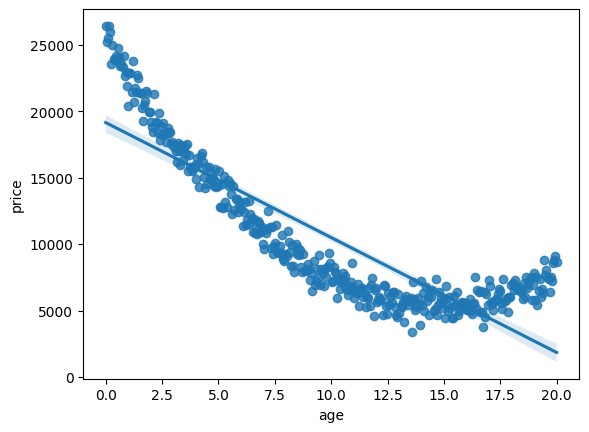

In [28]:
sns.regplot(data=df, x= 'age', y='price')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df[['age']] 
y = df['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
intercept = model.intercept_ 
slope = model.coef_[0] 
print(intercept, slope)

19152.23927037701 -874.753746904847


In [35]:
# Đánh giá trên train
print("model.score:", model.score(X_train, y_train))
print("r2_score:", r2_score(y_train, model.predict(X_train)))

model.score: 0.7633559891551596
r2_score: 0.7633559891551596


In [20]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(r2, mse, mae )

0.7344288122505611 9413970.460312966 2566.259657467722


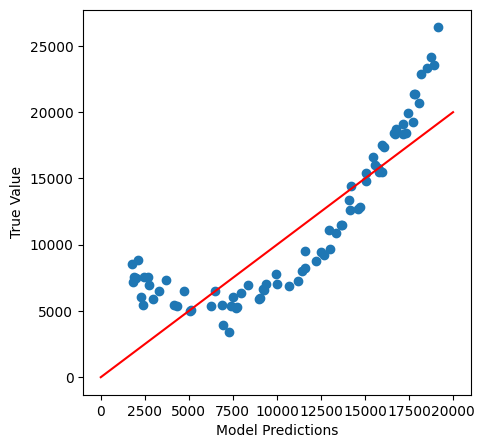

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(model.predict(X_test), y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 20000], [0, 20000],'-r' )
plt.show()

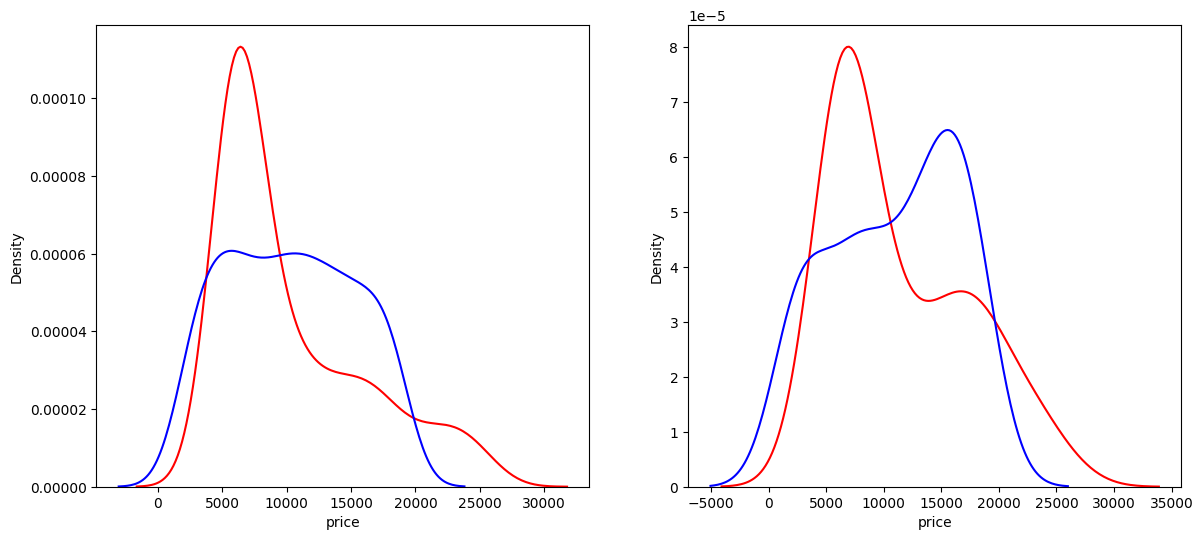

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(model.predict(X_train), hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(model.predict(X_test), hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)

plt.show()